**Load Datasets**

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import re

data = r"C:\Users\RGUKT\Documents\Patient Sentiment Analysis from Feedback\doctorReviews.csv"   #Yout dataset directorr
df = pd.read_csv(data)

df.head()

,Unnamed: 0,reviews,labels,tag
0,93,he explained initially that it takes 4-5 sitin...,0,negative
1,33,great dr definitely recommend he recommends le...,1,positive
2,129,doctor came and spent 9 seconds and recommende...,0,negative
3,7,i am completely satisfied with the consultatio...,1,positive
4,38,my experience was nice dr dyed was cool and co...,1,positive


**Data Cleaning**

In [7]:
#Dropping the 'Unnamed: 0' column as it seems to be just an identifier
df_cleaned = df.drop(['Unnamed: 0'], axis=1)

#Checking for missing values
missing_values = df_cleaned.isnull().sum()

#Preprocessing text data
#Removing punctuation, converting text to lowercase, and removing stopwords
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#Creating function to preprocess text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

#Applying the preprocessing function to the review column
df_cleaned['reviews_cleaned'] = df_cleaned['reviews'].apply(preprocess_text)

#Displaying the first few rows of the cleaned data
df_cleaned.head(), missing_values

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RGUKT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(                                             reviews  labels       tag  \
 0  he explained initially that it takes 4-5 sitin...       0  negative   
 1  great dr definitely recommend he recommends le...       1  positive   
 2  doctor came and spent 9 seconds and recommende...       0  negative   
 3  i am completely satisfied with the consultatio...       1  positive   
 4  my experience was nice dr dyed was cool and co...       1  positive   
 
                                      reviews_cleaned  
 0  explained initially takes 45 sitings total tre...  
 1  great dr definitely recommend recommends less ...  
 2  doctor came spent 9 seconds recommended nose t...  
 3  completely satisfied consultation acute severe...  
 4  experience nice dr dyed cool compose patiently...  ,
 reviews    0
 labels     0
 tag        0
 dtype: int64)

In [8]:
#Simplifying text preprocessing without stopwords removal

def simplified_preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

#Applying the simplified preprocessing function to the review column
df_cleaned['reviews_cleaned'] = df_cleaned['reviews'].apply(simplified_preprocess_text)

#Displaing the first few rows of the cleaned data
df_cleaned.head(), missing_values

(                                             reviews  labels       tag  \
 0  he explained initially that it takes 4-5 sitin...       0  negative   
 1  great dr definitely recommend he recommends le...       1  positive   
 2  doctor came and spent 9 seconds and recommende...       0  negative   
 3  i am completely satisfied with the consultatio...       1  positive   
 4  my experience was nice dr dyed was cool and co...       1  positive   
 
                                      reviews_cleaned  
 0  he explained initially that it takes 45 siting...  
 1  great dr definitely recommend he recommends le...  
 2  doctor came and spent 9 seconds and recommende...  
 3  i am completely satisfied with the consultatio...  
 4  my experience was nice dr dyed was cool and co...  ,
 reviews    0
 labels     0
 tag        0
 dtype: int64)

**Data Visualization**

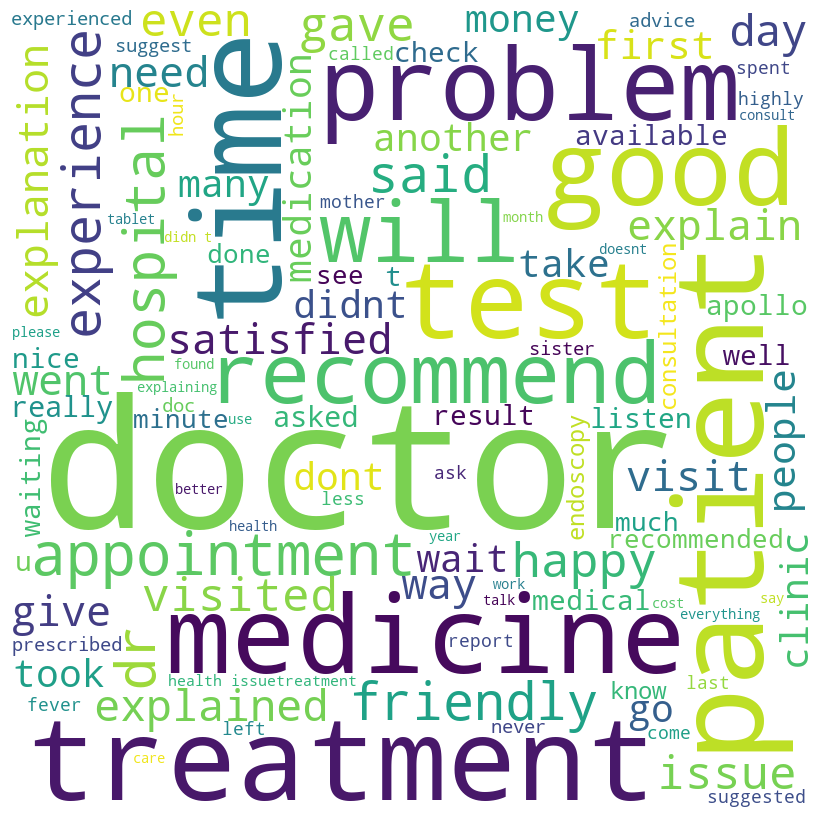

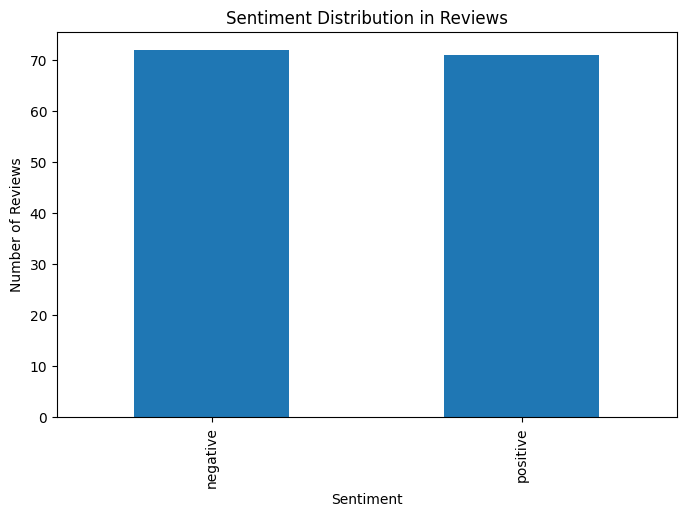

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import wordcloud

#Specifying the font path
font_path = r"C:\Users\RGUKT\AppData\Roaming\Python\Python312\site-packages\wordcloud\DroidSansMono.ttf"

#Generating a word cloud for reviews
wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      min_font_size=10, 
                      font_path=font_path).generate(' '.join(df_cleaned['reviews_cleaned']))

#Plotting the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 

plt.show()

#Plotting the sentiment distribution
sentiment_count = df_cleaned['tag'].value_counts()
plt.figure(figsize=(8,5))
sentiment_count.plot(kind='bar')
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

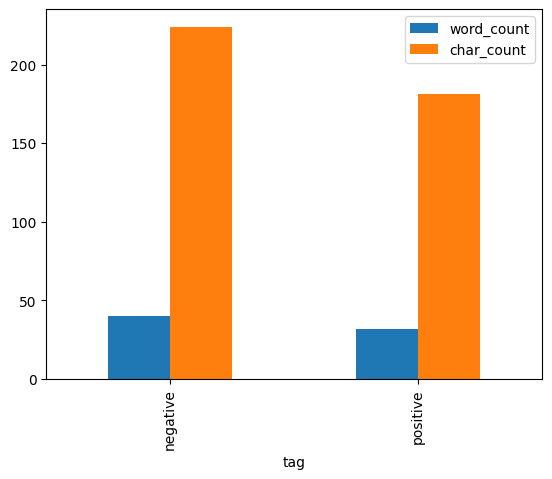

In [18]:
df_cleaned['word_count'] = df_cleaned['reviews'].apply(lambda x: len(x.split()))
df_cleaned['char_count'] = df_cleaned['reviews'].apply(len)

average_lengths = df_cleaned.groupby('tag')[['word_count', 'char_count']].mean()

import matplotlib.pyplot as plt
average_lengths.plot(kind='bar')
plt.show()

**Vectorization**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#Preparing the data for modeling
#Defining the feature and target variable
X = df_cleaned['reviews_cleaned']
y = df_cleaned['labels']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

X_train_vect.shape, X_test_vect.shape

((114, 1033), (29, 1033))

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

#Initializing the models
logreg = LogisticRegression()
naive_bayes = MultinomialNB()
svm = SVC()

#Training the models
logreg.fit(X_train_vect, y_train)
naive_bayes.fit(X_train_vect, y_train)
svm.fit(X_train_vect, y_train)

#Predictions and evaluations
models = {'Logistic Regression': logreg, 'Naive Bayes': naive_bayes, 'SVM': svm}
accuracy_scores = {}
confusion_matrices = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test_vect)
    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

accuracy_scores, confusion_matrices['Logistic Regression'], confusion_matrices['Naive Bayes'], confusion_matrices['SVM']

({'Logistic Regression': 0.9310344827586207,
  'Naive Bayes': 0.8275862068965517,
  'SVM': 0.896551724137931},
 array([[15,  0],
        [ 2, 12]], dtype=int64),
 array([[12,  3],
        [ 2, 12]], dtype=int64),
 array([[14,  1],
        [ 2, 12]], dtype=int64))

In [22]:
import pickle

#Pickling the best model (Logistic Regression) and the vectorizer
model_filename = r"C:\Users\RGUKT\Documents\Patient Sentiment Analysis from Feedback\logistic_regression_model.pkl"
vectorizer_filename = r"C:\Users\RGUKT\Documents\Patient Sentiment Analysis from Feedback\tfidf_vectorizer.pkl"

#Saving the model
with open(model_filename, 'wb') as file:
    pickle.dump(logreg, file)

#Saving the vectorizer
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(vectorizer, file)

model_filename, vectorizer_filename

('C:\\Users\\RGUKT\\Documents\\Patient Sentiment Analysis from Feedback\\logistic_regression_model.pkl',
 'C:\\Users\\RGUKT\\Documents\\Patient Sentiment Analysis from Feedback\\tfidf_vectorizer.pkl')

In [1]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import re

# Function to preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    return text

# Load trained model and TF-IDF vectorizer
model = joblib.load(r'C:\Users\RGUKT\Documents\Patient Sentiment Analysis from Feedback\logistic_regression_model.pkl')
tfidf_vectorizer = joblib.load(r'C:\Users\RGUKT\Documents\Patient Sentiment Analysis from Feedback\tfidf_vectorizer.pkl')

# Function to predict sentiment
def predict_sentiment(user_input):
    if not user_input.strip():
        return "Please enter a valid review."
    
    processed_text = preprocess_text(user_input)  # Preprocess text
    vectorized_text = tfidf_vectorizer.transform([processed_text])  # Vectorize text
    prediction = model.predict(vectorized_text)  # Predict sentiment
    sentiment = 'Positive' if prediction == 1 else 'Negative'
    return sentiment

# Gradio Interface
iface = gr.Interface(
    fn=predict_sentiment,  # Function to run
    inputs=gr.Textbox(lines=5, placeholder="Enter a doctor review..."),  # Input field
    outputs="text",  # Output text
    title="Doctor Review Sentiment Analysis",
    description="Enter a doctor review to predict whether the sentiment is Positive or Negative."
)

# Launch Gradio app
iface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
